In [1]:
# 1. Basic setup and load API Keys
import json

# production api contributes to iexCloud monthly data limit
PRODUCTION_API = "https://cloud.iexapis.com"
TESTING_API = "https://sandbox.iexapis.com"
TESTING = True
VERSION = "beta"
BASE_URL = TESTING_API if TESTING else PRODUCTION_API
QUERY_STRING = "token={}"
# ENDPOINT = "stock/{symbol}/{data}/{last}/{field}"

def get_keys(test = True):
    with open("apiKeys.json") as f:
        keys = json.load(f)
        iex = keys['iexCloud']
        if test:
            return iex['test']
        else:
            return iex['live']

API_KEY = get_keys(TESTING)

In [2]:
# 2.Load tickers we want to get data for

def get_tickers():
    with open("tickers.txt") as f:
        return f.read().split()
        return tickers
    
TICKERS = get_tickers()

In [3]:
# 3. Get data for each ticker and store it in a dictionary
import requests
import collections

ticker_data = {}

def build_request(symbol, datatype, last="", field=""):
    options = [BASE_URL, VERSION, "stock", symbol, datatype, last, field]
    endpoint = "/".join(filter(None, options))
    query = QUERY_STRING.format(API_KEY)
    url = "?".join([endpoint, query])
    return url

def make_requests(tickers):
    ticker_data = collections.defaultdict(list)
    for ticker in tickers:
        req = build_request(ticker, "quote")
        res = requests.get(req)
        data = json.loads(res.text) # parse JSON response
        
        for k, v in data.items(): # some formatting for pandas
            ticker_data[k].append(v)

    return ticker_data
    
TICKER_DATA = make_requests(TICKERS)

In [15]:
# 4. Load data into pandas DataFrame
import pandas as pd
PANDAS_DATA = pd.DataFrame.from_dict(TICKER_DATA)
PANDAS_DATA

,symbol,companyName,calculationPrice,open,openTime,close,closeTime,high,low,latestPrice,...,avgTotalVolume,iexBidPrice,iexBidSize,iexAskPrice,iexAskSize,marketCap,peRatio,week52High,week52Low,ytdChange
0,TSLA,"Tesla, Inc.",close,237.00,1593348218996,235.57,1626102580373,237.960,224.300,235.55,...,12366017,0,0,0,0,4.074555e+10,-40.43,405.60,177.42,-0.283041
1,F,Ford Motor Co.,close,10.33,1575362604583,10.16,1580431339186,10.710,10.520,10.41,...,32531896,0,0,0,0,4.184755e+10,13.52,11.40,7.72,0.285140
2,TM,Toyota Motor Corp.,close,130.40,1620809410009,132.00,1587750466442,127.900,130.900,129.00,...,133664,0,0,0,0,NaN,10.90,136.61,115.15,0.092051
3,GM,General Motors Co.,close,39.95,1589182551106,38.95,1609357008466,40.130,39.390,39.69,...,9674388,0,0,0,0,5.441870e+10,6.11,43.60,30.73,0.141754
4,RACE,Ferrari NV,close,165.64,1629923078236,171.56,1579963716647,167.800,171.000,165.48,...,443889,0,0,0,0,3.050257e+10,33.52,171.50,96.02,0.691299
5,FCAU,Fiat Chrysler Automobiles NV,close,14.14,1571794962309,14.65,1591435410647,14.000,13.930,14.27,...,3425012,0,0,0,0,2.263702e+10,5.90,21.12,12.88,-0.023594
6,HMC,"Honda Motor Co., Ltd.",close,27.40,1566368333546,27.30,1563631092277,26.380,26.560,26.30,...,623452,0,0,0,0,NaN,8.62,31.19,25.52,-0.014742
7,WGO,"Winnebago Industries, Inc.",close,39.67,1572498149790,39.59,1618447139916,40.300,39.360,38.70,...,536005,0,0,0,0,1.239810e+09,11.10,43.58,20.26,0.543098
8,THO,"Thor Industries, Inc.",close,58.08,1603961404969,57.81,1600724078583,59.300,57.130,58.00,...,1045709,0,0,0,0,3.229783e+09,23.69,112.29,49.58,0.093058
9,CCMP,Cabot Microelectronics Corp.,close,117.66,1620578550342,115.20,1612757232209,113.920,114.079,114.86,...,239211,0,0,0,0,3.277164e+09,23.73,133.52,85.77,0.175531


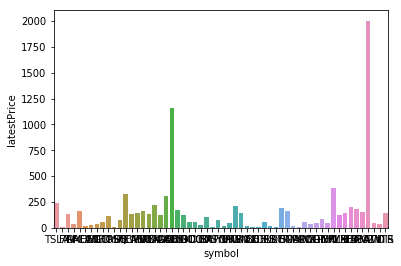

In [16]:
import seaborn as sns

PANDAS_DATA['latestPrice']
sns.barplot(x = "symbol", y = "latestPrice", data = PANDAS_DATA)